## Connect to upstream components

This notebook shows a new functionality of the tool to connect the input gene list. Instead of looking for a path, as the default connecting strategy of the tool, this functionality aims to find those upstream regulators that regulate as many of the input genes.

In [1]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
from omniflow_project._annotations.gene_ontology import Ontology
import omnipath as op


/home/eirini/anaconda3/envs/omniflow_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 1.52 s, sys: 374 ms, total: 1.9 s
Wall time: 1.79 s


In [2]:
interactions = op.interactions.CollecTRI.get()

In [3]:
interactions

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,n_sources,n_primary_sources,n_references,references_stripped
0,P01106,O14746,False,True,False,True,True,False,82,CollecTRI:10022128;CollecTRI:10491298;CollecTR...,CollecTRI;DoRothEA-A_CollecTRI;ExTRI_CollecTRI...,8,1,74,10022128;10491298;10606235;10637317;10723141;1...
1,P17947,P02818,False,True,False,True,True,False,3,CollecTRI:10022617,CollecTRI;ExTRI_CollecTRI,2,1,1,10022617
2,COMPLEX:P15407_P17275,P05412,False,True,False,True,True,False,53,CollecTRI:10022869;CollecTRI:10037172;CollecTR...,CollecTRI;ExTRI_CollecTRI;NTNU.Curated_CollecT...,4,1,49,10022869;10037172;10208431;10366004;11281649;1...
3,COMPLEX:P01100_P05412,P05412,False,True,False,True,True,False,53,CollecTRI:10022869;CollecTRI:10037172;CollecTR...,CollecTRI;ExTRI_CollecTRI;NTNU.Curated_CollecT...,4,1,49,10022869;10037172;10208431;10366004;11281649;1...
4,COMPLEX:P01100_P17275,P05412,False,True,False,True,True,False,53,CollecTRI:10022869;CollecTRI:10037172;CollecTR...,CollecTRI;ExTRI_CollecTRI;NTNU.Curated_CollecT...,4,1,49,10022869;10037172;10208431;10366004;11281649;1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64490,Q01196,Q13094,False,True,False,True,True,False,3,CollecTRI:20019798,CollecTRI;DoRothEA-A_CollecTRI,2,1,1,20019798
64491,Q01196,Q6MZQ0,False,True,False,True,True,False,3,CollecTRI:20019798,CollecTRI;DoRothEA-A_CollecTRI,2,1,1,20019798
64492,Q15672,P08151,False,True,False,True,True,False,3,CollecTRI:11948912,CollecTRI;DoRothEA-A_CollecTRI,2,1,1,11948912
64493,P22415,Q5SRE5,False,True,False,True,True,False,3,CollecTRI:22951020,CollecTRI;DoRothEA-A_CollecTRI,2,1,1,22951020


In [9]:
genes = ["SRC", "NOTCH1", "CDH1", "CDH2", "VIM", "LATS1", "LATS2"]


In [10]:
new_net1 = Network(genes)

In [11]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,CDH1,P12830,NaN
3,CDH2,P19022,NaN
4,VIM,P08670,NaN
5,LATS1,O95835,NaN
6,LATS2,Q9NRM7,NaN


In [12]:
%%time
new_net1.connect_to_upstream_nodes()

P17612 P08670
P17612 O95835
P17612 P12931
P17612 Q9NRM7
P68400 P12830
O60716 P12830
O60716 P19022
P12931 P19022
P12931 P12830
O14672 P12830
O14672 P46531
O00192 P12830
O00192 P19022
Q9UQB3 P19022
Q9UQB3 P12830
CPU times: user 523 ms, sys: 230 µs, total: 524 ms
Wall time: 522 ms


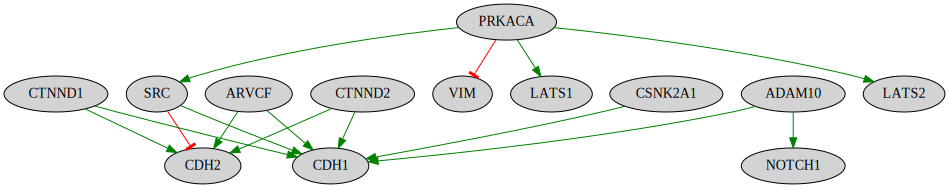

In [13]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()